In [1]:
pip install pandas

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd

<font size="5">1. Работа с таблицей</font>

<font size="4">1.1. Чтение таблицы</font>

In [3]:
df = pd.read_csv("TRB_10_7/TRB_10_7.tsv", sep="\t")

In [4]:
df.head()

,TGTGCCAGCAGCGGTAGGGGGACACTATTGGGCACCTTC,CASSGRGTLLGTF,TRBV7-9,TRBJ1-2
0,TGTGGACGGAAGGACGAGCAGTACTTC,CGRKDEQYF,TRBV20-1,TRBJ2-7
1,TGCAGTGCTCGGGGCGTCTTCTCTGAAGCTTTCTTT,CSARGVFSEAFF,TRBV20-1,TRBJ1-1
2,TGTGCCACCAATGACAGGGGGCGCACCTACAATGAGCAGTTCTTC,CATNDRGRTYNEQFF,TRBV24-1,TRBJ2-1
3,TGTGCCAGCAGTTTAGCTGGACTAGCGGGTTGTCGGAAGTTGACGG...,CASSLAGLAGCRKLTEETQYF,TRBV27,TRBJ2-5
4,TGTGCCAGCAGCGTAGCAGGGGCGGGGAGTAGCTCCTACGAGCAGT...,CASSVAGAGSSSYEQYF,TRBV9,TRBJ2-7


In [5]:
df = df.rename(columns={'TRBV7-9': 'names'})

In [6]:
df.head()

,TGTGCCAGCAGCGGTAGGGGGACACTATTGGGCACCTTC,CASSGRGTLLGTF,names,TRBJ1-2
0,TGTGGACGGAAGGACGAGCAGTACTTC,CGRKDEQYF,TRBV20-1,TRBJ2-7
1,TGCAGTGCTCGGGGCGTCTTCTCTGAAGCTTTCTTT,CSARGVFSEAFF,TRBV20-1,TRBJ1-1
2,TGTGCCACCAATGACAGGGGGCGCACCTACAATGAGCAGTTCTTC,CATNDRGRTYNEQFF,TRBV24-1,TRBJ2-1
3,TGTGCCAGCAGTTTAGCTGGACTAGCGGGTTGTCGGAAGTTGACGG...,CASSLAGLAGCRKLTEETQYF,TRBV27,TRBJ2-5
4,TGTGCCAGCAGCGTAGCAGGGGCGGGGAGTAGCTCCTACGAGCAGT...,CASSVAGAGSSSYEQYF,TRBV9,TRBJ2-7


<font size="4">1.2. Построение графика</font>

In [7]:
import seaborn as sns 

<Axes: xlabel='names', ylabel='Count'>

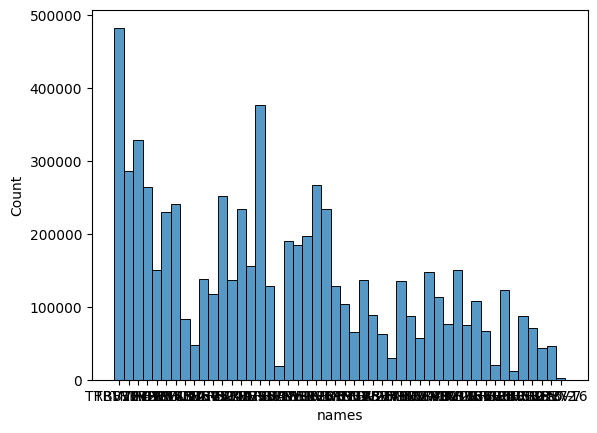

In [8]:
sns.histplot(df['names'])

<font size="5">2. Картинка</font>

![alt-text](https://static.ctclove.ru/uploads/fileskoti/mnogo.jpg)

<font size="5">3. Осваиваем R</font>

In [9]:
pip install rpy2

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [10]:
%load_ext rpy2.ipython

In [11]:
import rpy2.robjects
from rpy2.robjects import pandas2ri
from rpy2.robjects import globalenv

In [13]:
pandas2ri.activate()

In [14]:
r_df = pandas2ri.py2rpy(df)

In [15]:
%%R 
install.packages("ggplot2")

--- Please select a CRAN mirror for use in this session ---
Secure CRAN mirrors 

 1: 0-Cloud [https]
 2: Australia (Canberra) [https]
 3: Australia (Melbourne 1) [https]
 4: Australia (Melbourne 2) [https]
 5: Austria (Wien 1) [https]
 6: Belgium (Brussels) [https]
 7: Brazil (PR) [https]
 8: Brazil (SP 1) [https]
 9: Brazil (SP 2) [https]
10: Bulgaria [https]
11: Canada (MB) [https]
12: Canada (ON 1) [https]
13: Canada (ON 2) [https]
14: Chile (Santiago) [https]
15: China (Beijing 2) [https]
16: China (Beijing 3) [https]
17: China (Hefei) [https]
18: China (Hong Kong) [https]
19: China (Jinan) [https]
20: China (Lanzhou) [https]
21: China (Nanjing) [https]
22: China (Shanghai 2) [https]
23: China (Shenzhen) [https]
24: China (Wuhan) [https]
25: Colombia (Cali) [https]
26: Costa Rica [https]
27: Cyprus [https]
28: Czech Republic [https]
29: Denmark [https]
30: East Asia [https]
31: Ecuador (Cuenca) [https]
32: France (Lyon 1) [https]
33: France (Lyon 2) [https]
34: France (Paris 1) [h

Selection:  6


* installing *source* package ‘ggplot2’ ...
** package ‘ggplot2’ successfully unpacked and MD5 sums checked
** using staged installation
** R
** data
*** moving datasets to lazyload DB
** inst
** byte-compile and prepare package for lazy loading
** help
*** installing help indices
*** copying figures
** building package indices
** installing vignettes
** testing if installed package can be loaded from temporary location
** testing if installed package can be loaded from final location
** testing if installed package keeps a record of temporary installation path
* DONE (ggplot2)


Installing package into ‘/home/mbaikalov/R/x86_64-pc-linux-gnu-library/4.1’
(as ‘lib’ is unspecified)
trying URL 'https://ftp.belnet.be/mirror/CRAN/src/contrib/ggplot2_3.5.1.tar.gz'
Content type 'application/octet-stream' length 3604371 bytes (3.4 MB)
downloaded 3.4 MB


The downloaded source packages are in
	‘/scratch/RtmpMBcFwi/downloaded_packages’


In [16]:
%%R 
library(ggplot2)

In [17]:
globalenv['r_df'] = r_df

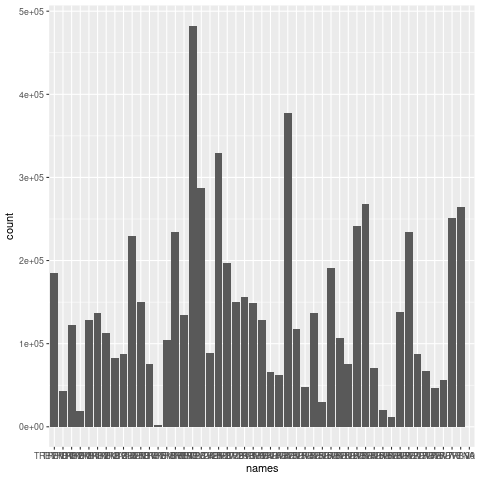

In [18]:
%%R
ggplot(r_df, aes(x = names)) + geom_bar(stat = "count")